Generating 5000 records...
Dataset saved to plant_watering_dataset.csv

Sample data:


,timestamp,moisture_before,duration,threshold,moisture_after,needed_watering
0,2025-01-21 08:34:12.048866,22,9,35,58,True
1,2024-12-23 08:34:12.048866,40,14,25,62,False
2,2024-12-12 08:34:12.048866,9,15,30,31,True
3,2024-09-03 08:34:12.048866,23,3,25,67,True
4,2024-11-23 08:34:12.048866,12,12,35,54,True



Basic statistics:


,timestamp,moisture_before,duration,threshold,moisture_after
count,5000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2024-09-23 19:01:28.052143360,22.472800,9.002800,30.055000,57.023200
min,2024-03-24 08:34:12.064439,5.000000,3.000000,25.000000,25.000000
25%,2024-06-24 08:34:12.423819008,14.000000,6.000000,25.000000,47.000000
50%,2024-09-24 08:34:12.431630848,23.000000,9.000000,30.000000,57.000000
75%,2024-12-23 08:34:12.080068096,31.000000,12.000000,35.000000,67.000000
max,2025-03-24 08:34:12.439443,40.000000,15.000000,35.000000,89.000000
std,NaN,10.347032,3.751587,4.088437,13.474397


Matplotlib is building the font cache; this may take a moment.


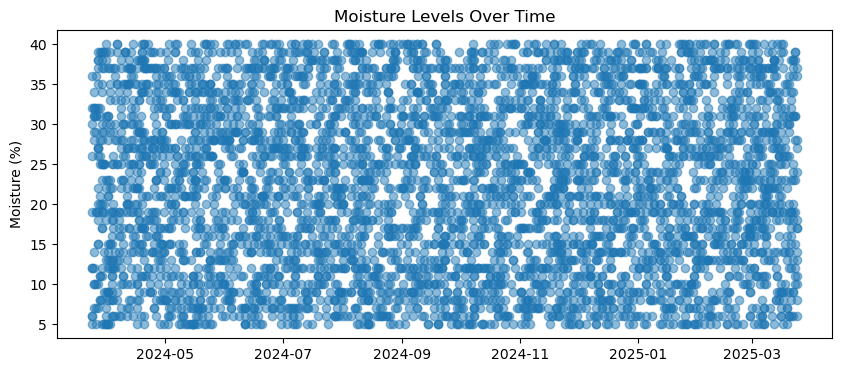

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Configuration
NUM_RECORDS = 5000  # Number of records to generate
OUTPUT_FILE = 'plant_watering_dataset.csv'

# Generate random data
def generate_record():
    return {
        'timestamp': datetime.now() - timedelta(days=random.randint(0, 365)),
        'moisture_before': random.randint(5, 40),
        'duration': random.randint(3, 15),
        'threshold': random.choice([25, 30, 35])
    }

# Generate dataset
print(f"Generating {NUM_RECORDS} records...")
records = [generate_record() for _ in range(NUM_RECORDS)]

# Create DataFrame
df = pd.DataFrame(records)

# Add derived columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['moisture_after'] = df['moisture_before'] + np.random.randint(20, 50, size=len(df))
df['moisture_after'] = df['moisture_after'].clip(upper=100)
df['needed_watering'] = df['moisture_before'] < df['threshold']

# Save to CSV
df.to_csv(OUTPUT_FILE, index=False)
print(f"Dataset saved to {OUTPUT_FILE}")

# Show sample and stats
print("\nSample data:")
display(df.head())

print("\nBasic statistics:")
display(df.describe())

# Optional: Plot some data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.scatter(df['timestamp'], df['moisture_before'], alpha=0.5)
plt.title('Moisture Levels Over Time')
plt.ylabel('Moisture (%)')
plt.show()